In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import ta
import quantstats as qs

In [5]:
def load_weekly_data(ticker):
    df = yf.download(ticker, interval = '1wk', period = 'max')[['Open','High','Low','Close','Volume','Adj Close']].reset_index()
    df['Ratio'] = df['Adj Close'] / df['Close']
    df['Open'] = df['Open'] * df['Ratio']
    df['High'] = df['High'] * df['Ratio']
    df['Low'] = df['Low'] * df['Ratio']
    df['Close'] = df['Close'] * df['Ratio']
    df = df.drop(['Ratio', 'Adj Close'], axis = 1)
    df.columns = ['date','open','high','low','close','volume']
    df = df.set_index(['date'])
    df = df.dropna()
    
    return df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-02-15  2010-02-15
End Period                 2022-07-06  2022-07-06
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          2,122.98%   341.11%
CAGR﹪                     28.43%      12.72%

Sharpe                     4.16        1.72
Prob. Sharpe Ratio         100.0%      99.67%
Smart Sharpe               3.94        1.63
Sortino                    6.43        2.47
Smart Sortino              6.09        2.34
Sortino/√2                 4.54        1.75
Smart Sortino/√2           4.3         1.66
Omega                      2.08        2.08

Max Drawdown               -20.92%     -33.4%
Longest DD Days            567         273
Volatility (ann.)          31.19%      39.15%
R^2                        0.01        0.01
Information Ratio          0.08        0.08
Calmar                     1.36       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2015-07-20,2016-05-16,2017-02-06,567,-20.917643,-20.596447
2,2020-02-17,2020-06-08,2020-10-12,238,-14.938421,-13.689172
3,2022-04-18,2022-07-04,2022-07-06,79,-14.081416,-13.744905
4,2018-09-03,2018-12-17,2019-04-15,224,-12.551026,-12.466429
5,2018-01-29,2018-02-05,2018-05-14,105,-9.382325,-6.606575


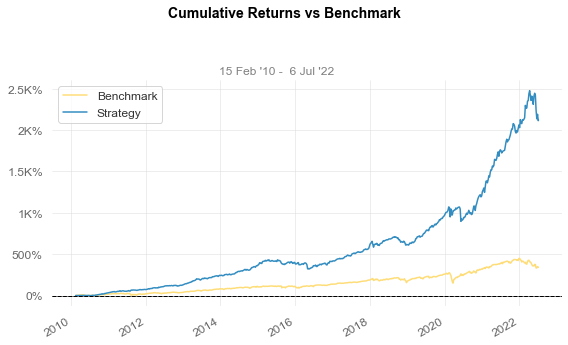

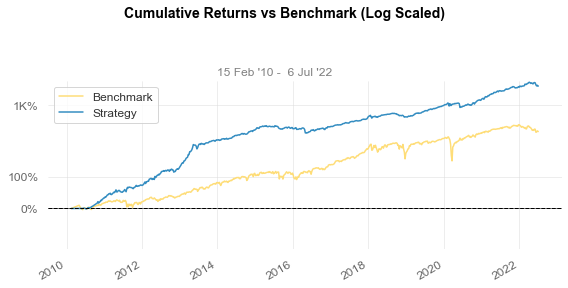

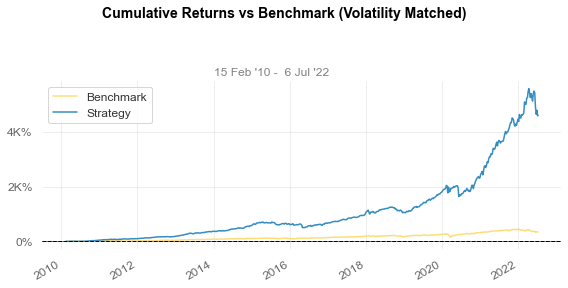

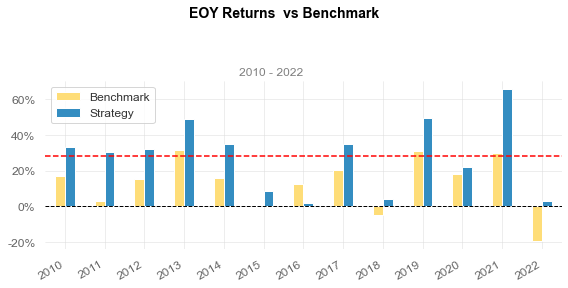

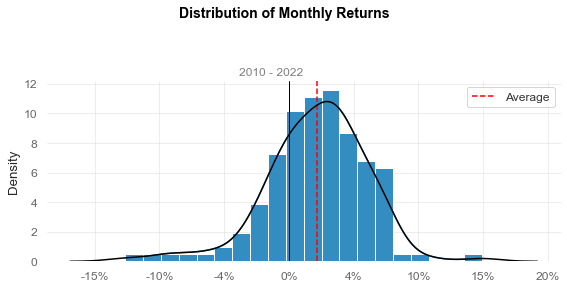

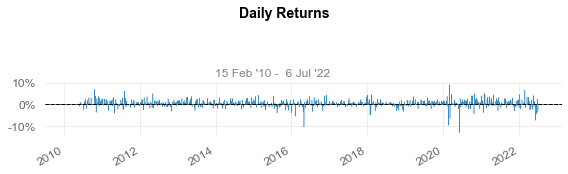

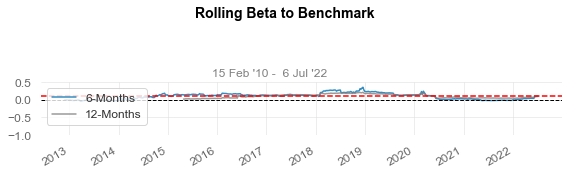

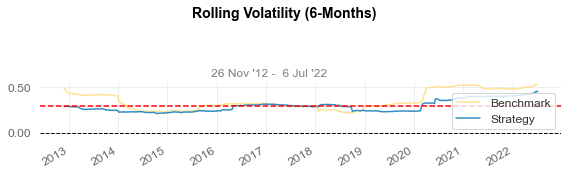

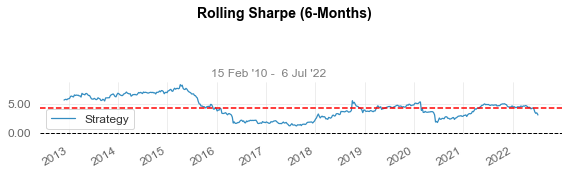

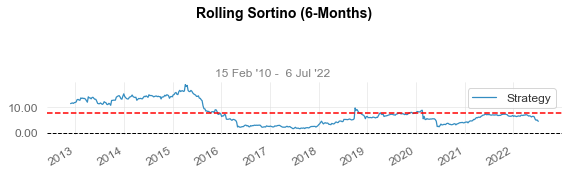

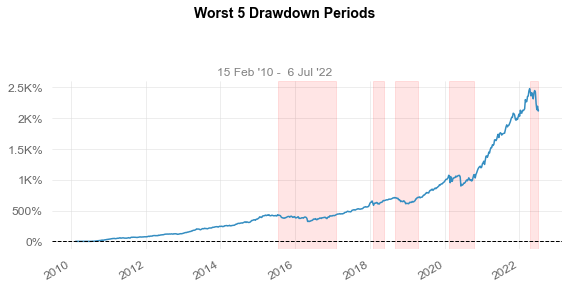

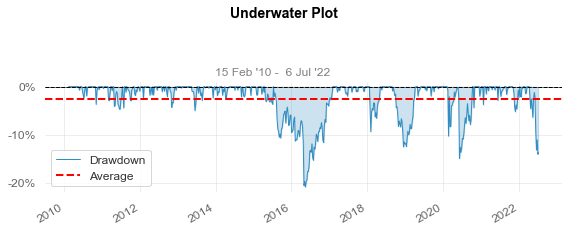

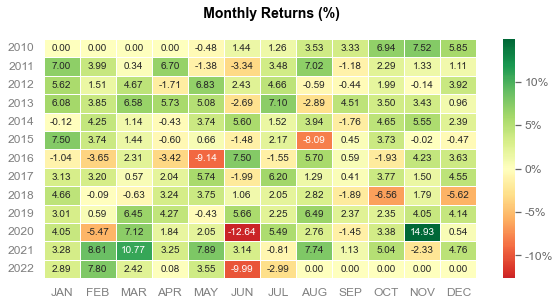

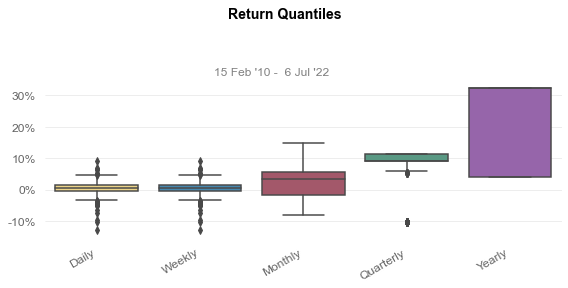

In [6]:
tickerList = ['SPY', 'QQQ', 'VNQ', 'IEF', 'TLT', 'TIP', 'VGK', 'EUNN.DE' ,'SXRG.DE', 'EEM', 
           'RWX', 'BWX', 'DBC', 'GLD', 'JNK', 'XLU', 'XLP', 'XLE']

df = pd.DataFrame(index = load_weekly_data('SPY').index)

for ticker in tickerList:
    df[ticker] = load_weekly_data(ticker).close
    
df.dropna(inplace = True)
momentum = pd.DataFrame(index = df.index)
for ticker in tickerList:
    momentum[ticker] = df[ticker]/ta.momentum.kama(df[ticker], window = 10, pow1 = 5, pow2 = 10) - 1

momentum.dropna(inplace = True)
momentum = momentum.tail(len(momentum) - 1)

rank = momentum.rank(pct = True, axis = 1);mask = rank >= 3/4;nAssets = np.sum(np.where(mask == True, 1, 0), axis = 1)
returns = df[mask.shift(1)].tail(len(rank)).pct_change();returns['nAssets'] = nAssets
returns['portfolio'] = returns[returns.columns[:len(tickerList)]].sum(axis = 1)/returns.nAssets
qs.reports.full(returns.portfolio, 'SPY')